In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de visualização
plt.style.use("ggplot")
pd.set_option("display.max_columns", None)

print("Bibliotecas carregadas com sucesso!")


Bibliotecas carregadas com sucesso!


In [7]:
import numpy as np
import pandas as pd

# Definir semente para reproduzir os resultados
np.random.seed(42)

# Quantidade de clientes simulados
n_clientes = 2000

# Gerar colunas básicas
id_cliente = np.arange(1, n_clientes + 1)

idade = np.random.randint(18, 71, size=n_clientes)  # 18 a 70 anos

# Renda mensal: distribuição lognormal (a maioria ganha pouco, poucos ganham muito)
renda = np.random.lognormal(mean=7.5, sigma=0.5, size=n_clientes)
# Ajustar para valores mais “humanos”
renda = np.clip(renda, 1000, 30000)

# Tempo de emprego (em anos)
tempo_emprego_anos = np.round(np.random.exponential(scale=5, size=n_clientes), 1)
tempo_emprego_anos = np.clip(tempo_emprego_anos, 0, 35)

# Valor total de dívida
valor_divida = renda * np.random.uniform(0, 2.5, size=n_clientes)

# Número de atrasos nos últimos 12 meses
num_atrasos_12m = np.random.poisson(lam=1.5, size=n_clientes)
num_atrasos_12m = np.clip(num_atrasos_12m, 0, 10)

# Utilização do limite de crédito (0 a 1)
utilizacao_credito = np.random.beta(a=2, b=5, size=n_clientes)

# Possui cartão de crédito (0/1)
possui_cartao_credito = np.random.binomial(1, p=0.7, size=n_clientes)

# Score interno (tipo score de banco, 300 a 950)
score_interno = np.random.normal(loc=650, scale=80, size=n_clientes)
score_interno = np.clip(score_interno, 300, 950).astype(int)

# ---- Gerar probabilidade de inadimplência (regra "realista") ----

# Começa com uma base
logit = -2.0

# Mais inadimplência para quem tem muitos atrasos
logit += 0.35 * num_atrasos_12m

# Mais risco para alta utilização de crédito
logit += 2.0 * (utilizacao_credito - 0.6)

# Mais risco para dívida alta em relação à renda
relacao_divida_renda = valor_divida / (renda + 1)
logit += 0.2 * relacao_divida_renda

# Menos risco para score interno alto
logit += -0.003 * (score_interno - 650)

# Risco extra para rendas muito baixas
logit += 0.8 * (renda < 2000)

# Converter logit em probabilidade (função sigmóide)
prob_inadimplencia = 1 / (1 + np.exp(-logit))

# Gerar variável binária de inadimplência (0 = não, 1 = sim)
inadimplente = np.random.binomial(1, prob_inadimplencia)

# Montar o DataFrame final
df_credit = pd.DataFrame({
    "id_cliente": id_cliente,
    "idade": idade,
    "renda": renda.round(2),
    "tempo_emprego_anos": tempo_emprego_anos,
    "valor_divida": valor_divida.round(2),
    "num_atrasos_12m": num_atrasos_12m,
    "utilizacao_credito": utilizacao_credito.round(3),
    "possui_cartao_credito": possui_cartao_credito,
    "score_interno": score_interno,
    "relacao_divida_renda": relacao_divida_renda.round(3),
    "inadimplente": inadimplente
})

# Salvar no diretório data/
caminho_csv = "../data/credit_data.csv"
df_credit.to_csv(caminho_csv, index=False, encoding="utf-8")

caminho_csv, df_credit.head()


('../data/credit_data.csv',
    id_cliente  idade    renda  tempo_emprego_anos  valor_divida  \
 0           1     56  2502.64                13.7       4977.61   
 1           2     69  1720.57                 1.0        608.15   
 2           3     46  4551.98                 2.3       1483.04   
 3           4     32  1058.87                13.2       1703.27   
 4           5     60  1000.00                 0.3        492.96   
 
    num_atrasos_12m  utilizacao_credito  possui_cartao_credito  score_interno  \
 0                0               0.470                      0            724   
 1                2               0.383                      0            629   
 2                0               0.101                      1            610   
 3                2               0.502                      1            647   
 4                1               0.456                      0            643   
 
    relacao_divida_renda  inadimplente  
 0                 1.988         

In [9]:
df = pd.read_csv("../data/credit_data.csv")
df.head()


,id_cliente,idade,renda,tempo_emprego_anos,valor_divida,num_atrasos_12m,utilizacao_credito,possui_cartao_credito,score_interno,relacao_divida_renda,inadimplente
0,1,56,2502.64,13.7,4977.61,0,0.470,0,724,1.988,0
1,2,69,1720.57,1.0,608.15,2,0.383,0,629,0.353,0
2,3,46,4551.98,2.3,1483.04,0,0.101,1,610,0.326,0
3,4,32,1058.87,13.2,1703.27,2,0.502,1,647,1.607,1
4,5,60,1000.00,0.3,492.96,1,0.456,0,643,0.492,0


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             2000 non-null   int64  
 1   idade                  2000 non-null   int64  
 2   renda                  2000 non-null   float64
 3   tempo_emprego_anos     2000 non-null   float64
 4   valor_divida           2000 non-null   float64
 5   num_atrasos_12m        2000 non-null   int64  
 6   utilizacao_credito     2000 non-null   float64
 7   possui_cartao_credito  2000 non-null   int64  
 8   score_interno          2000 non-null   int64  
 9   relacao_divida_renda   2000 non-null   float64
 10  inadimplente           2000 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 172.0 KB


In [11]:
df.isna().sum()


id_cliente               0
idade                    0
renda                    0
tempo_emprego_anos       0
valor_divida             0
num_atrasos_12m          0
utilizacao_credito       0
possui_cartao_credito    0
score_interno            0
relacao_divida_renda     0
inadimplente             0
dtype: int64

In [12]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
id_cliente,2000.0,1000.500000,577.494589,1.000,500.75000,1000.500,1500.2500,2000.000
idade,2000.0,44.376500,15.226644,18.000,31.00000,45.000,57.0000,70.000
renda,2000.0,2104.631265,1084.961572,1000.000,1323.51500,1827.390,2543.2175,12875.980
tempo_emprego_anos,2000.0,4.871900,4.843831,0.000,1.40000,3.300,6.7000,33.600
valor_divida,2000.0,2611.999690,2135.848677,0.810,1063.80750,2127.170,3667.5025,18601.830
num_atrasos_12m,2000.0,1.471500,1.178508,0.000,1.00000,1.000,2.0000,7.000
utilizacao_credito,2000.0,0.285318,0.160472,0.008,0.16200,0.266,0.3900,0.845
possui_cartao_credito,2000.0,0.675500,0.468305,0.000,0.00000,1.000,1.0000,1.000
score_interno,2000.0,648.371500,80.877426,341.000,593.75000,650.000,703.0000,950.000
relacao_divida_renda,2000.0,1.237011,0.719182,0.001,0.61275,1.229,1.8615,2.498


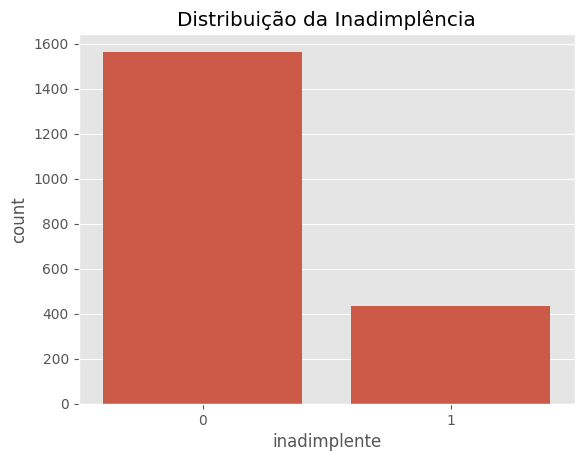

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="inadimplente", data=df)
plt.title("Distribuição da Inadimplência")
plt.show()


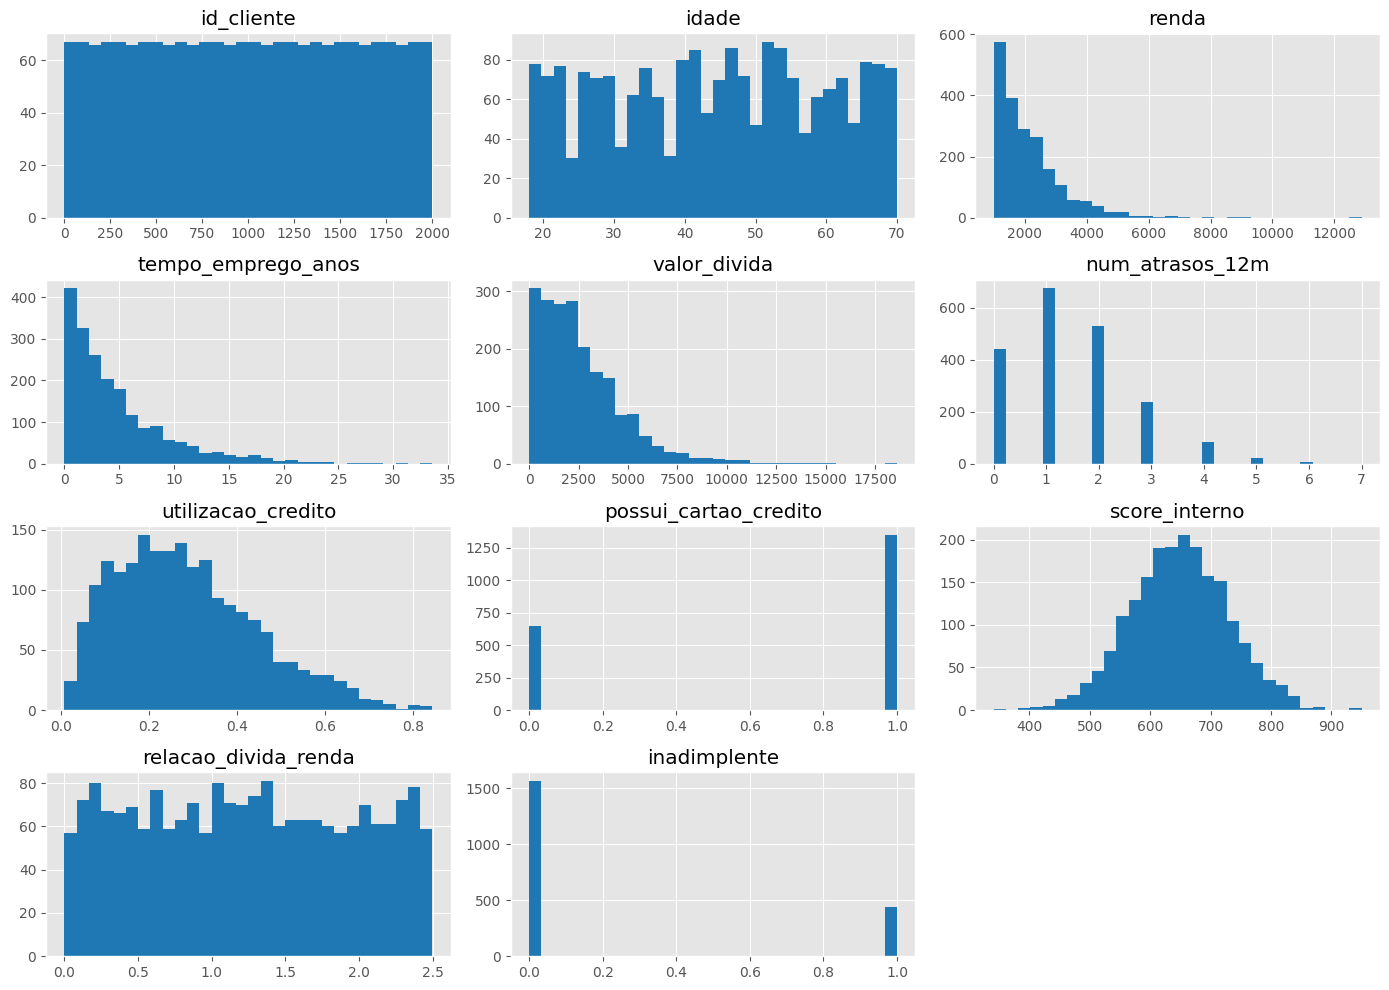

In [14]:
df.hist(
    figsize=(14, 10),
    bins=30,
    color="#1f77b4"
)
plt.tight_layout()
plt.show()


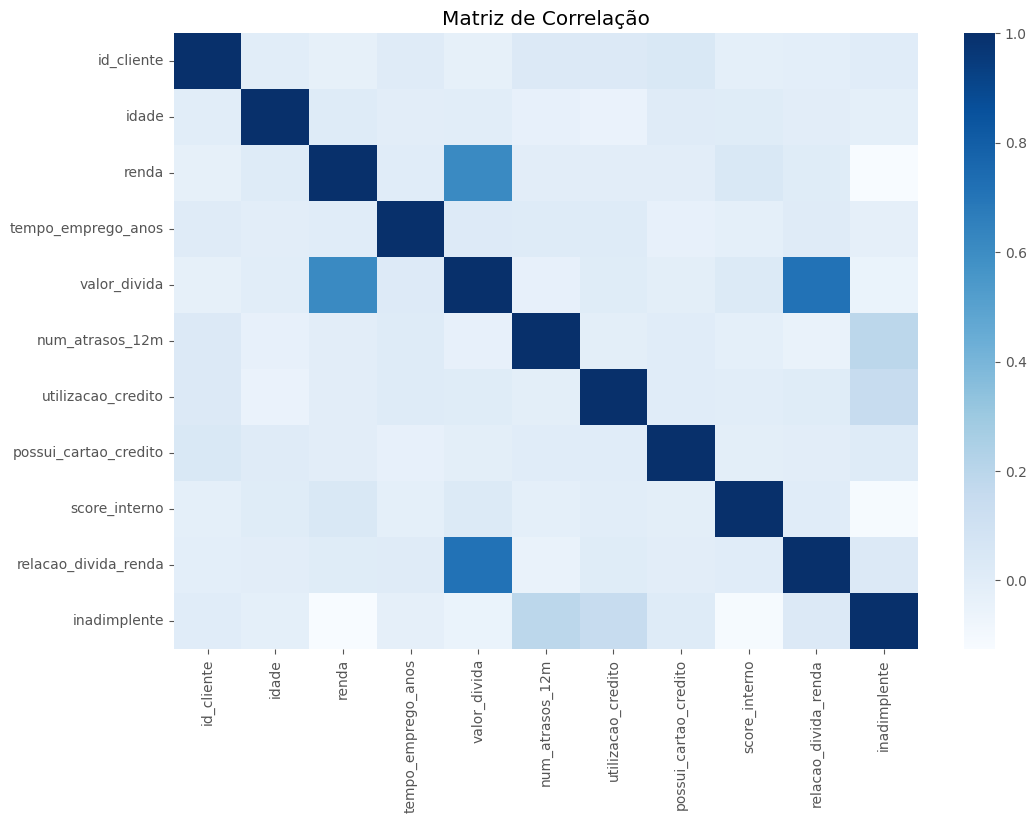

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="Blues", annot=False)
plt.title("Matriz de Correlação")
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

target = "inadimplente"

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

len(X_train), len(X_test)


(1400, 600)

In [17]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=2000)
modelo.fit(X_train, y_train)

print("Modelo treinado!")


Modelo treinado!


c:\Projetos\riskradar\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report

y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("AUC:", auc)
print("F1-score:", f1)
print("\nMatriz de Confusão:\n", cm)


AUC: 0.6963166718208305
F1-score: 0.15894039735099338

Matriz de Confusão:
 [[461   8]
 [119  12]]


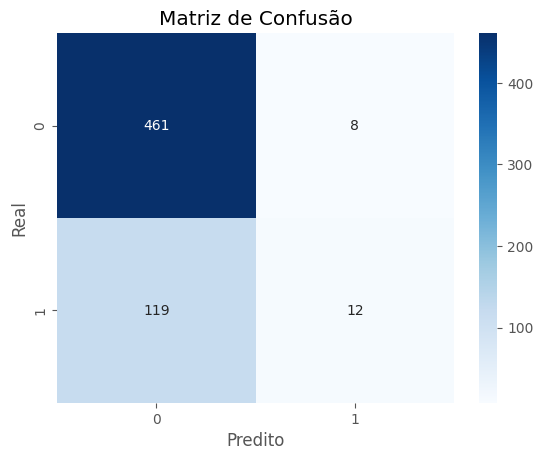

In [19]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


In [20]:
import numpy as np
coef = modelo.coef_[0]

importancia = pd.DataFrame({
    "variavel": X.columns,
    "coeficiente": coef,
    "importancia_abs": np.abs(coef)
})

importancia.sort_values("importancia_abs", ascending=False)


,variavel,coeficiente,importancia_abs
6,utilizacao_credito,1.758686,1.758686
5,num_atrasos_12m,0.405822,0.405822
9,relacao_divida_renda,0.173890,0.173890
7,possui_cartao_credito,0.164467,0.164467
3,tempo_emprego_anos,-0.025744,0.025744
8,score_interno,-0.003408,0.003408
1,idade,-0.003202,0.003202
2,renda,-0.000439,0.000439
4,valor_divida,0.000043,0.000043
0,id_cliente,-0.000014,0.000014


In [21]:
import joblib

joblib.dump(modelo, "../models/model.pkl")
print("Modelo salvo em ../models/model.pkl")


Modelo salvo em ../models/model.pkl
